In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('indeed_job_dataset.csv')

In [4]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [5]:
def fixDFcolsForR(myDF):
    for i in range(myDF.shape[1]): # for each col
        if myDF.iloc[:, i].dtype == 'O': # check if col is type object
            myDF.iloc[:, i] = myDF.iloc[:, i].astype(str) # if yes set type to string
    return myDF

In [6]:
data = fixDFcolsForR(data)

In [7]:
%R -i data

In [8]:
data2 = data.groupby('Queried_Salary').agg({'No_of_Skills':'mean'}).reset_index()
data2['No_of_Skills'] = round(data2['No_of_Skills'],1)
%R -i data2
data2

,Queried_Salary,No_of_Skills
0,100000-119999,8.4
1,120000-139999,9.6
2,140000-159999,9.6
3,80000-99999,6.1
4,<80000,3.8
5,>160000,7.9


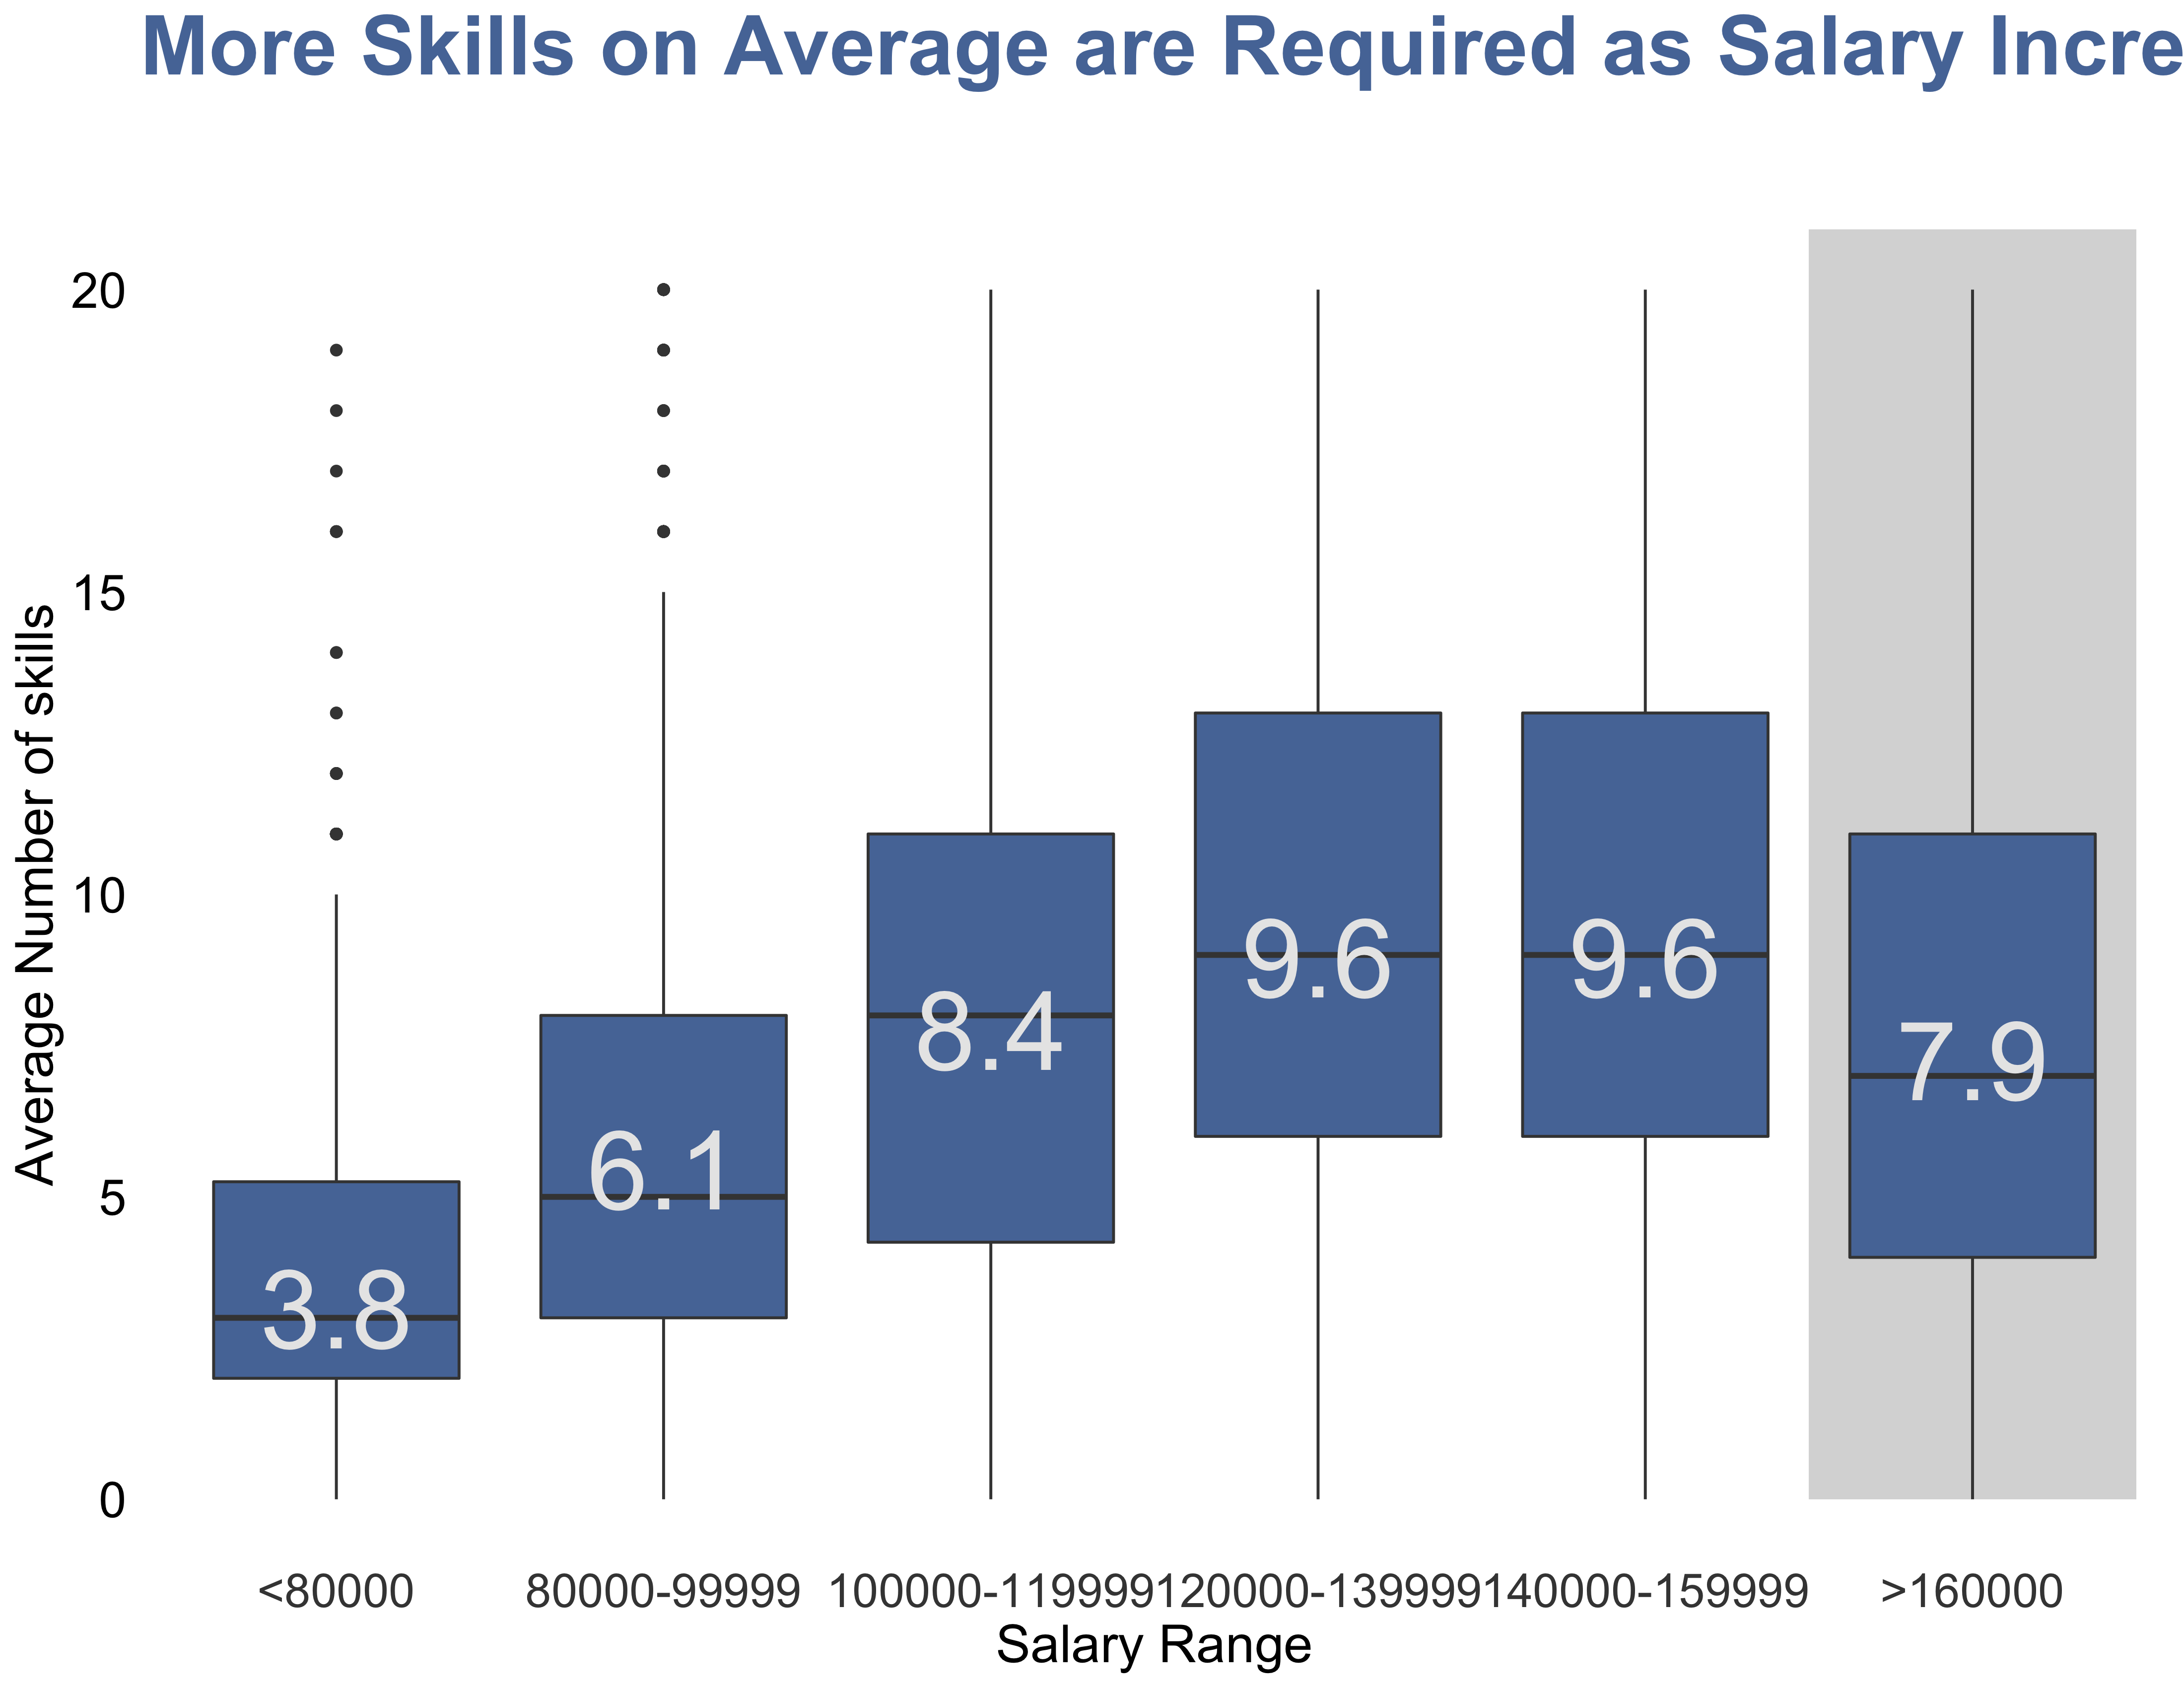

In [9]:
%%R -w 11 -h 8.5 --units in -r 400

data$Queried_Salary <- factor (data$Queried_Salary, 
                               levels=c('<80000','80000-99999','100000-119999',
                                        '120000-139999','140000-159999','>160000'))

ggplot()+
    ggtitle("More Skills on Average are Required as Salary Increases") +
    geom_boxplot(aes(x = Queried_Salary, y = No_of_Skills),data = data, fill = '#5677a6', alpha = 1, color = NA) +
    geom_rect(aes(xmin=5.5,xmax = 6.5,ymin = 0, ymax = Inf), fill = 'grey', alpha = 0.6) +
    geom_boxplot(aes(x = Queried_Salary, y = No_of_Skills),data = data, fill = '#5677a6', alpha = 1, color = 'GREY26') +
    geom_text(aes(x = Queried_Salary, y = No_of_Skills, label = No_of_Skills), data=data2, size = 14, color = 'grey91', vjust = 1) +
    xlab("Salary Range") +
    ylab("Average Number of skills") +
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_text(color = 'black', size = 18), axis.text.x = element_text(color = 'grey26', size =17),
          axis.title.y = element_text(size = 19),
          axis.title.x = element_text(size = 19),
         plot.title = element_text(size = 30, face = "bold", color = '#5677a6',margin = margin(t = 0, r = 0, b = 50, l = 0)))+

ggsave('/Users/xuliu/Desktop/EDA/final presentation/num_skills.png', units = 'in', width = 14, height = 9)


In [10]:
def foo(df, col):
    d = df.groupby(col).agg({'Link':'count'}).reset_index()
    a = d['Link'][0]
    b = d['Link'][1]
    g1=df.groupby([col,'Queried_Salary']).agg({'Link':'count'}).reset_index()
    g1.loc[(g1[col]==0),'rate']=g1.Link/a
    g1.loc[(g1[col]==1),'rate']=g1.Link/b
    return g1

In [11]:
g1 = foo(data, 'python')
g1_0 = data.loc[data['python']==0]
g1_0_count = g1.loc[g1['python']==0]
g1_1 = data.loc[data['python']==1]
g1_1_count = g1.loc[g1['python']==1]

g1_0_count['x'] = [119999,139999,159999,99999,80000,180000]
g1_1_count['x'] = [119999,139999,159999,99999,80000,180000]
g1['x'] = [119999,139999,159999,99999,80000,180000,119999,139999,159999,99999,80000,180000]

In [12]:
%R -i g1
%R -i g1_0
%R -i g1_1
%R -i g1_0_count
%R -i g1_1_count

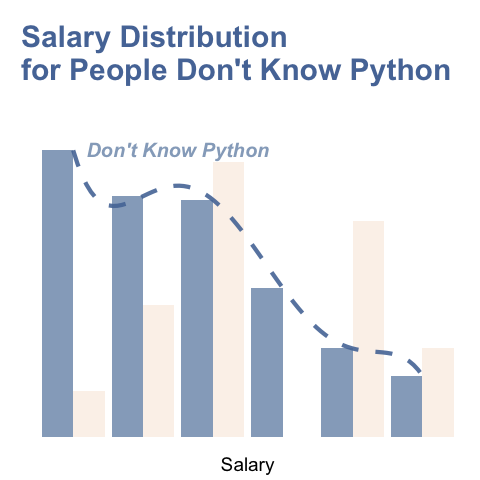

In [147]:
%%R 
# -w 8 -h 13 --units in -r 400

g1$python <- as.factor(g1$python)

ggplot()+
    ggtitle("Salary Distribution \nfor People Don't Know Python") +
    geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    geom_line(aes(x=x, y=rate),data = g1_1_count,stat="smooth",method = "lm",alpha = 0.1,se = FALSE,formula = y~poly(x,5),color = '#C76C3B', size = 2) +
#     geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    scale_alpha_discrete(range = c(1, 0.2))+
    geom_line(aes(x=x, y=rate),data = g1_0_count,stat="smooth",method = "lm",alpha = 0.9,se = FALSE,formula = y~poly(x,5),color = '#5677a6', size = 2, linetype = 'dashed') +
    scale_fill_manual(values = c("#96ABC5", '#EBBE92')) +
    theme(legend.position="none") +
    xlab("Salary") +
    ylab("") +
    scale_y_continuous(limits = c(0, .27)) +
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.x = element_text(size = 19),
         plot.title = element_text(size = 30, face = "bold", color = '#5677a6',margin = margin(t = 20, r = 0, b = 50, l = 0))) +
    annotate("text", x=110000, y=0.27, label= "Don't Know Python", fontface = 'bold.italic', 
         size = 7, color = '#96ABC5') +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/python_0.png', units = 'in', width = 8.5, height = 11)


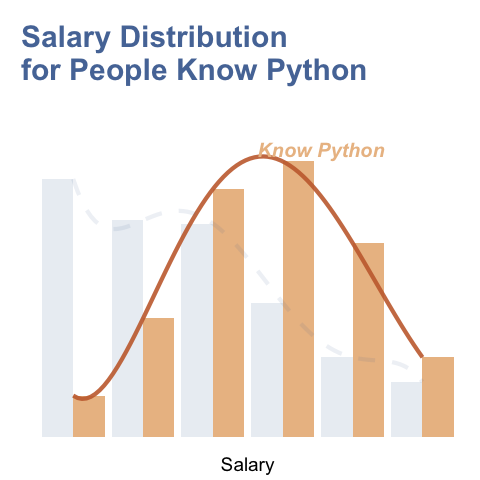

In [146]:
%%R 
#-w 8 -h 13 --units in -r 400

g1$python <- as.factor(g1$python)

ggplot()+
    ggtitle("Salary Distribution \nfor People Know Python") +
    geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    geom_line(aes(x=x, y=rate),data = g1_1_count,stat="smooth",method = "lm",alpha = 0.9,se = FALSE,formula = y~poly(x,5),color = '#C76C3B', size = 2) +
#     geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    scale_alpha_discrete(range = c(0.2, 1))+
    geom_line(aes(x=x, y=rate),data = g1_0_count,stat="smooth",method = "lm",alpha = 0.1,se = FALSE,formula = y~poly(x,5),color = '#5677a6', size = 2, linetype = 'dashed') +
    scale_fill_manual(values = c("#96ABC5", '#EBBE92')) +
    theme(legend.position="none") +
    xlab("Salary") +
    ylab("") +
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.x = element_text(size = 19),
          plot.title = element_text(size = 30, face = "bold", color = '#5677a6',margin = margin(t = 20, r = 0, b = 50, l = 0)))+
    annotate("text", x=150999, y=0.30, label= "Know Python", fontface = 'bold.italic', 
         size = 7, color = '#EBBE92') +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/python_1.png', units = 'in', width = 8.5, height = 11)


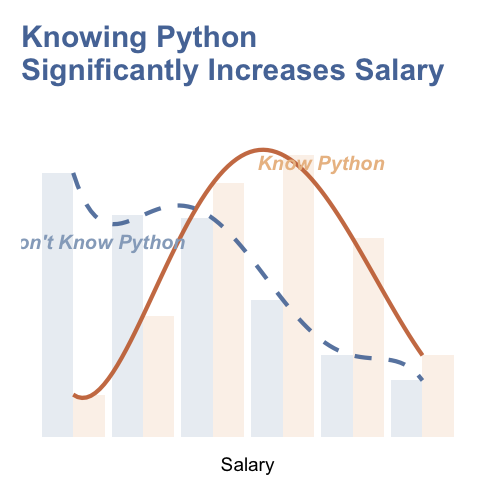

In [141]:
%%R 
#-w 8 -h 13 --units in -r 400

g1$python <- as.factor(g1$python)

ggplot()+
    ggtitle("Knowing Python \nSignificantly Increases Salary") +
    geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    geom_line(aes(x=x, y=rate),data = g1_1_count,stat="smooth",method = "lm",alpha = 0.9,se = FALSE,formula = y~poly(x,5),color = '#C76C3B', size = 2) +
#     geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    scale_alpha_discrete(range = c(0.2, 0.2))+
    geom_line(aes(x=x, y=rate),data = g1_0_count,stat="smooth",method = "lm",alpha = 0.9,se = FALSE,formula = y~poly(x,5),color = '#5677a6', size = 2, linetype = 'dashed') +
    scale_fill_manual(values = c("#96ABC5", '#EBBE92')) +
    theme(legend.position="none") +
    xlab("Salary") +
    ylab("") +
#     scale_y_continuous(limits = c(0, 1)) +
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.x = element_text(size = 19),
          plot.title = element_text(size = 30, face = "bold", color = '#5677a6',margin = margin(t = 20, r = 0, b = 50, l = 0))) +
    annotate("text", x=150999, y=0.28, label= "Know Python", fontface = 'bold.italic', 
         size = 7, color = '#EBBE92') +
    annotate("text", x=86000, y=0.20, label= "Don't Know Python", fontface = 'bold.italic', 
         size = 7, color = '#96ABC5') +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/python.png', units = 'in', width = 8.5, height = 11)


In [89]:
g2 = foo(data, 'r')
g2_0 = data.loc[data['r']==0]
g2_0_count = g2.loc[g2['r']==0]
g2_1 = data.loc[data['r']==1]
g2_1_count = g2.loc[g2['r']==1]

g2_1_count['x'] = [119999,139999,159999,99999,80000,180000]
g2['x'] = [119999,139999,159999,99999,80000,180000,119999,139999,159999,99999,80000,180000]
g2_0_count['x'] = [119999,139999,159999,99999,80000,180000]


In [90]:
%R -i g2
%R -i g2_0
%R -i g2_1
%R -i g2_0_count
%R -i g2_1_count

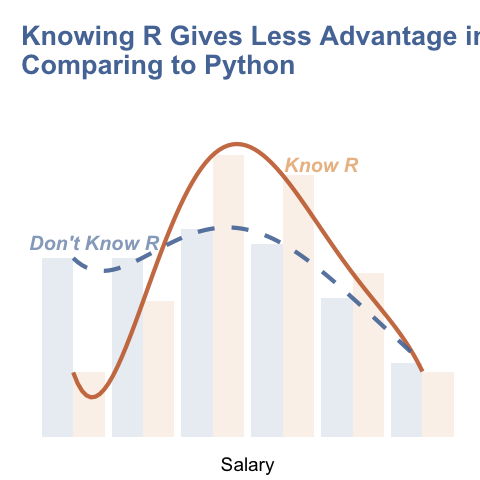

In [145]:
%%R 
#-w 8 -h 13 --units in -r 400

g2$r <- as.factor(g2$r)

ggplot()+
    ggtitle("Knowing R Gives Less Advantage in Salary \nComparing to Python") +
    geom_bar(aes(x=x, y=rate,fill=r, alpha=r), stat='identity',data=g2,position='dodge') +
    geom_line(aes(x=x, y=rate),data = g2_1_count,stat="smooth",method = "lm",alpha = 0.9,se = FALSE,formula = y~poly(x,5),color = '#C76C3B', size = 2) +
#     geom_bar(aes(x=x, y=rate,fill=python, alpha=python), stat='identity',data=g1,position='dodge') +
    scale_alpha_discrete(range = c(0.2, 0.2))+
    geom_line(aes(x=x, y=rate),data = g2_0_count,stat="smooth",method = "lm",alpha = 0.9,se = FALSE,formula = y~poly(x,5),color = '#5677a6', size = 2, linetype = 'dashed') +
    scale_fill_manual(values = c("#96ABC5", '#EBBE92')) +
    theme(legend.position="none") +
    xlab("Salary") +
    ylab("") +
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.x = element_text(size = 19),
         plot.title = element_text(size = 27, face = "bold", color = '#5677a6',margin = margin(t = 20, r = 0, b = 50, l = 0))) +
    annotate("text", x=150999, y=0.28, label= "Know R", fontface = 'bold.italic', 
         size = 7, color = '#EBBE92') +
    annotate("text", x=86000, y=0.20, label= "Don't Know R", fontface = 'bold.italic', 
         size = 7, color = '#96ABC5') +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/r.png', units = 'in', width = 8.5, height = 11)


In [19]:
d2 = data.groupby('Location').agg({'Link':'count'}).reset_index()
d2.columns = ['region','count']
%R -i d2

In [20]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [21]:
state = []
d2 = d2.loc[d2['region'].isin(states.keys())]
for i in d2['region']:
    state.append(str.lower(states[i]))

In [22]:
d2['region'] = state

In [23]:
%R -i d2

In [24]:
%%R

library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(ggplot2)
library(tidyverse)
library(dplyr)

R[write to console]: Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

R[write to console]: Please cite ggmap if you use it! See citation("ggmap") for details.

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

R[write to console]: ✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::map()    masks maps::map()



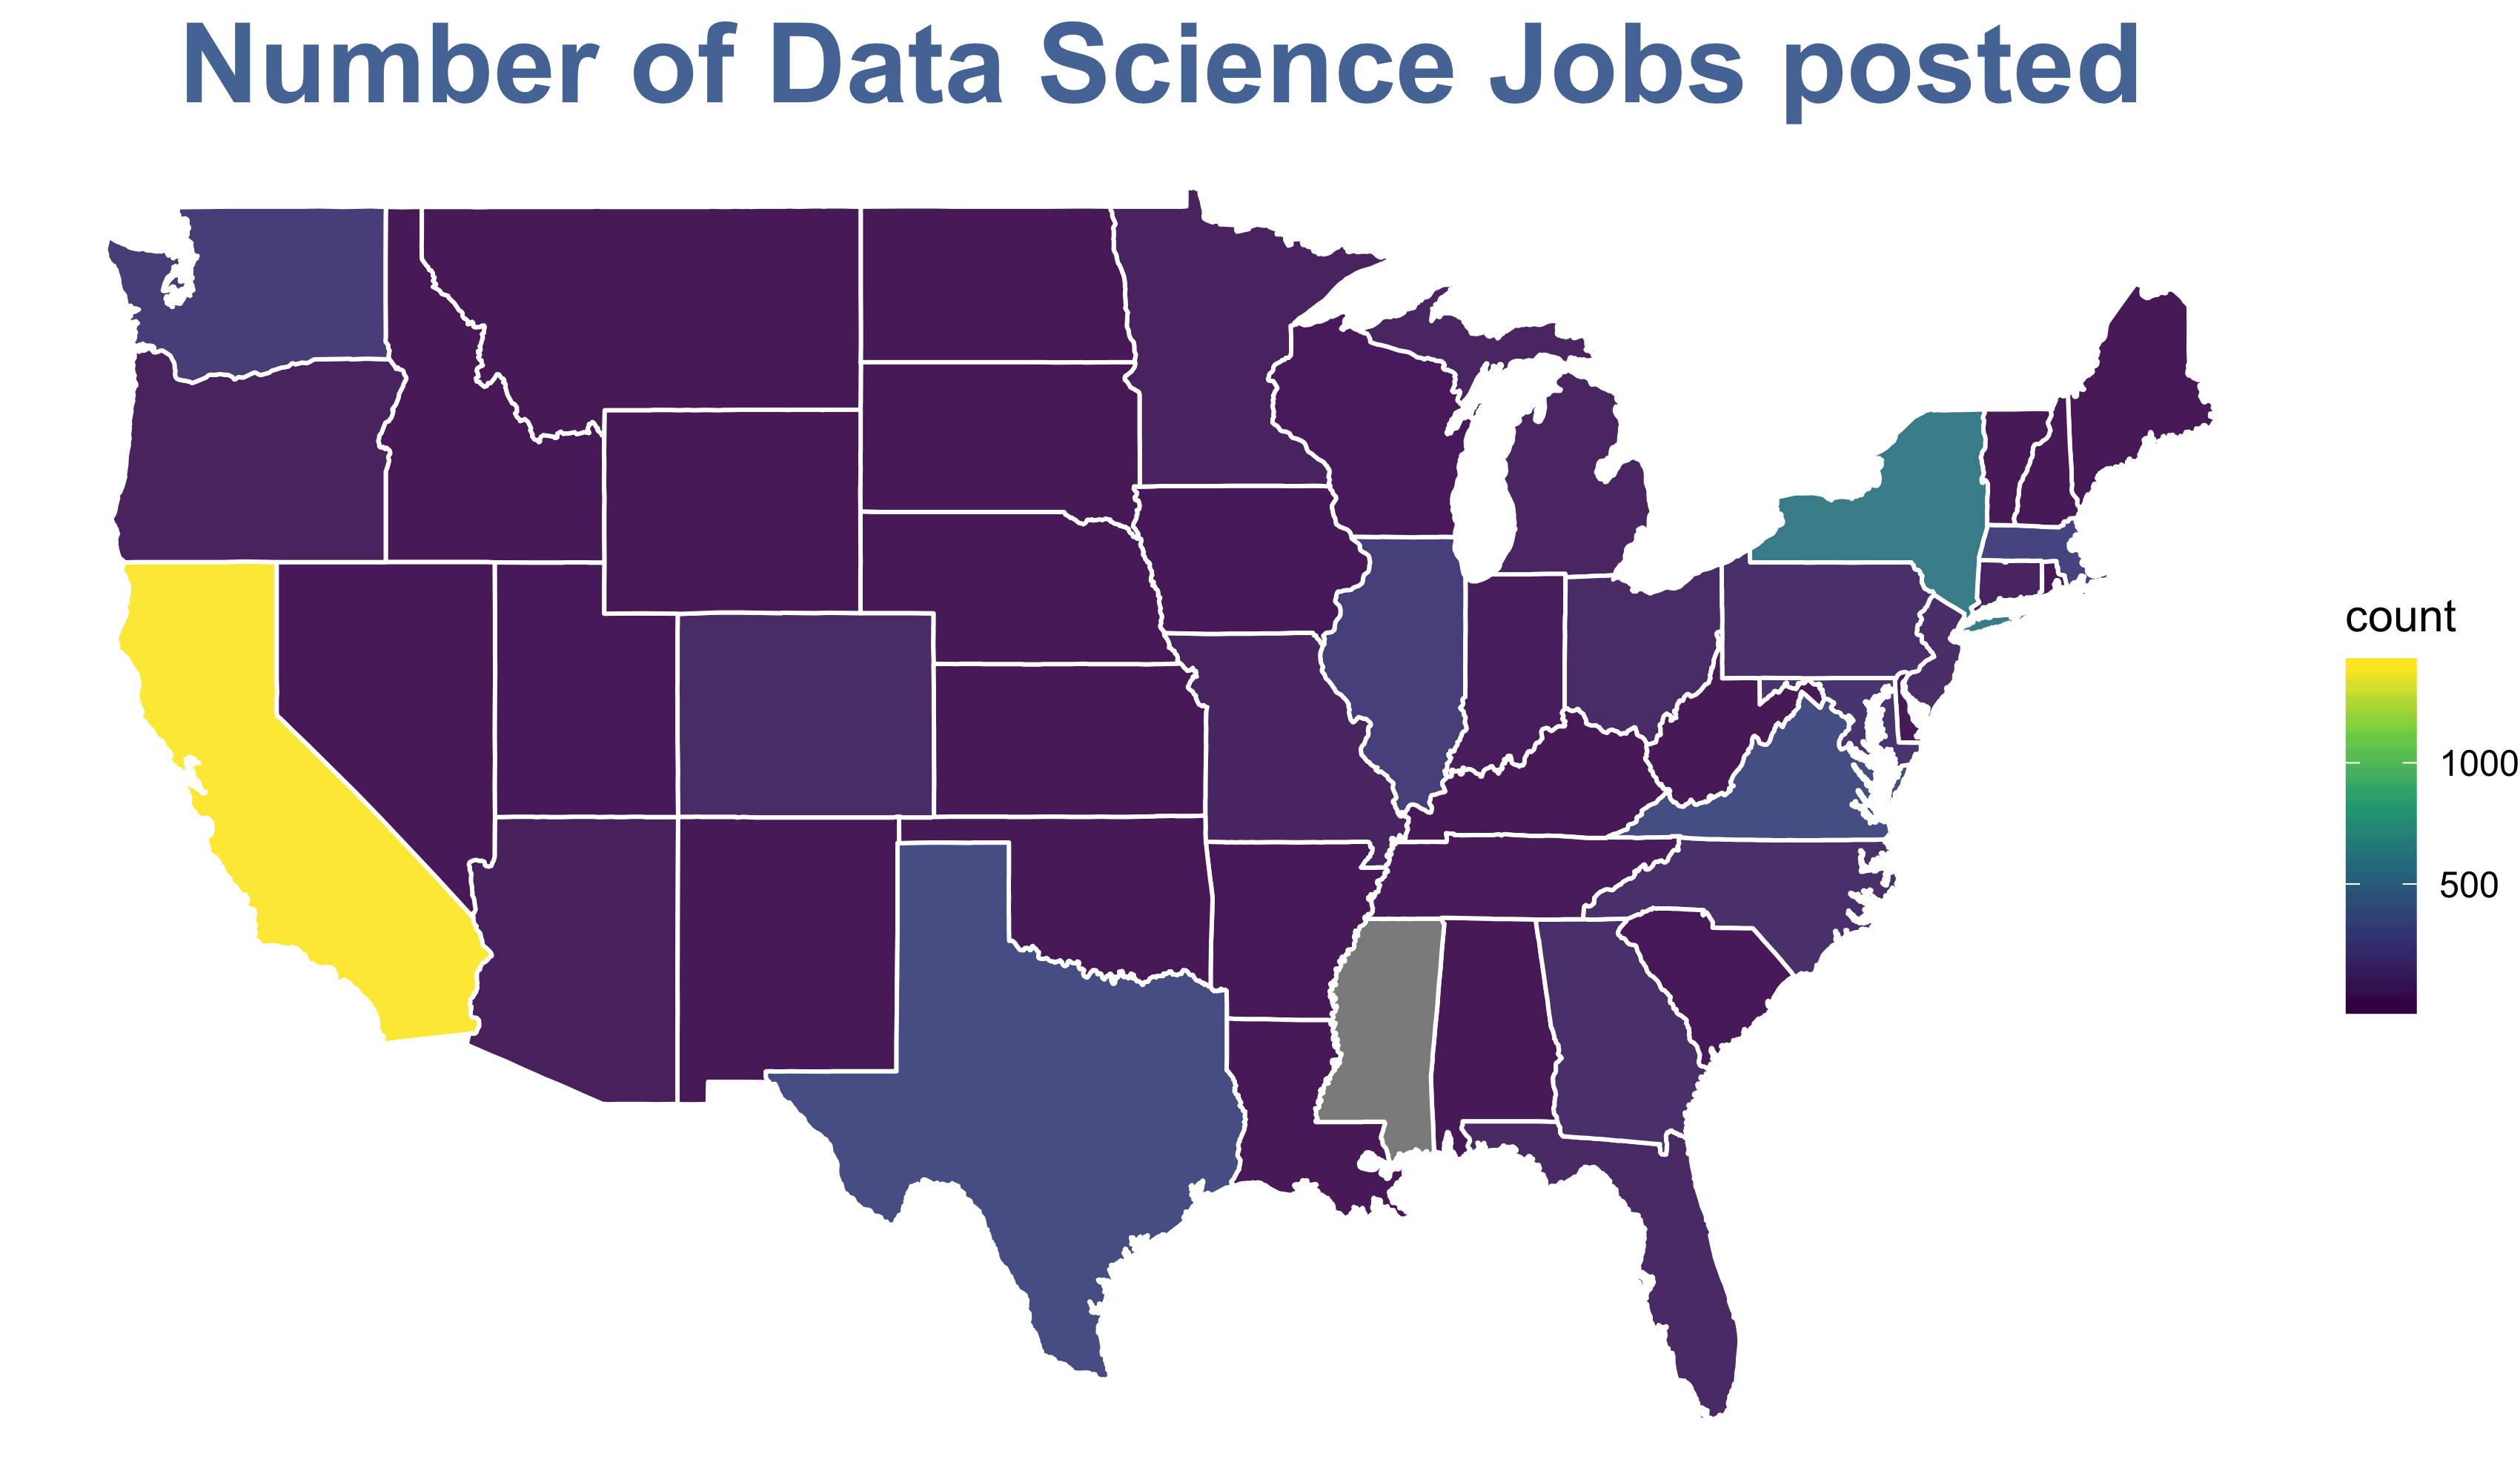

In [84]:
%%R -w 8.5 -h 5 --units in -r 400

us <- map_data("state")
data <- left_join(us, d2, by = "region")

ggplot(data, aes(long, lat, group = group))+
    ggtitle('Number of Data Science Jobs posted') +
    geom_polygon(aes(fill = count), color = "white", alpha = 0.9) +
    scale_fill_viridis_c(option="D") +
    theme_void() +
    theme(
         plot.title = element_text(size = 27, face = "bold", color = '#5677a6', hjust =0.5)) +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/map.png', units = 'in', width = 8.5, height = 5)

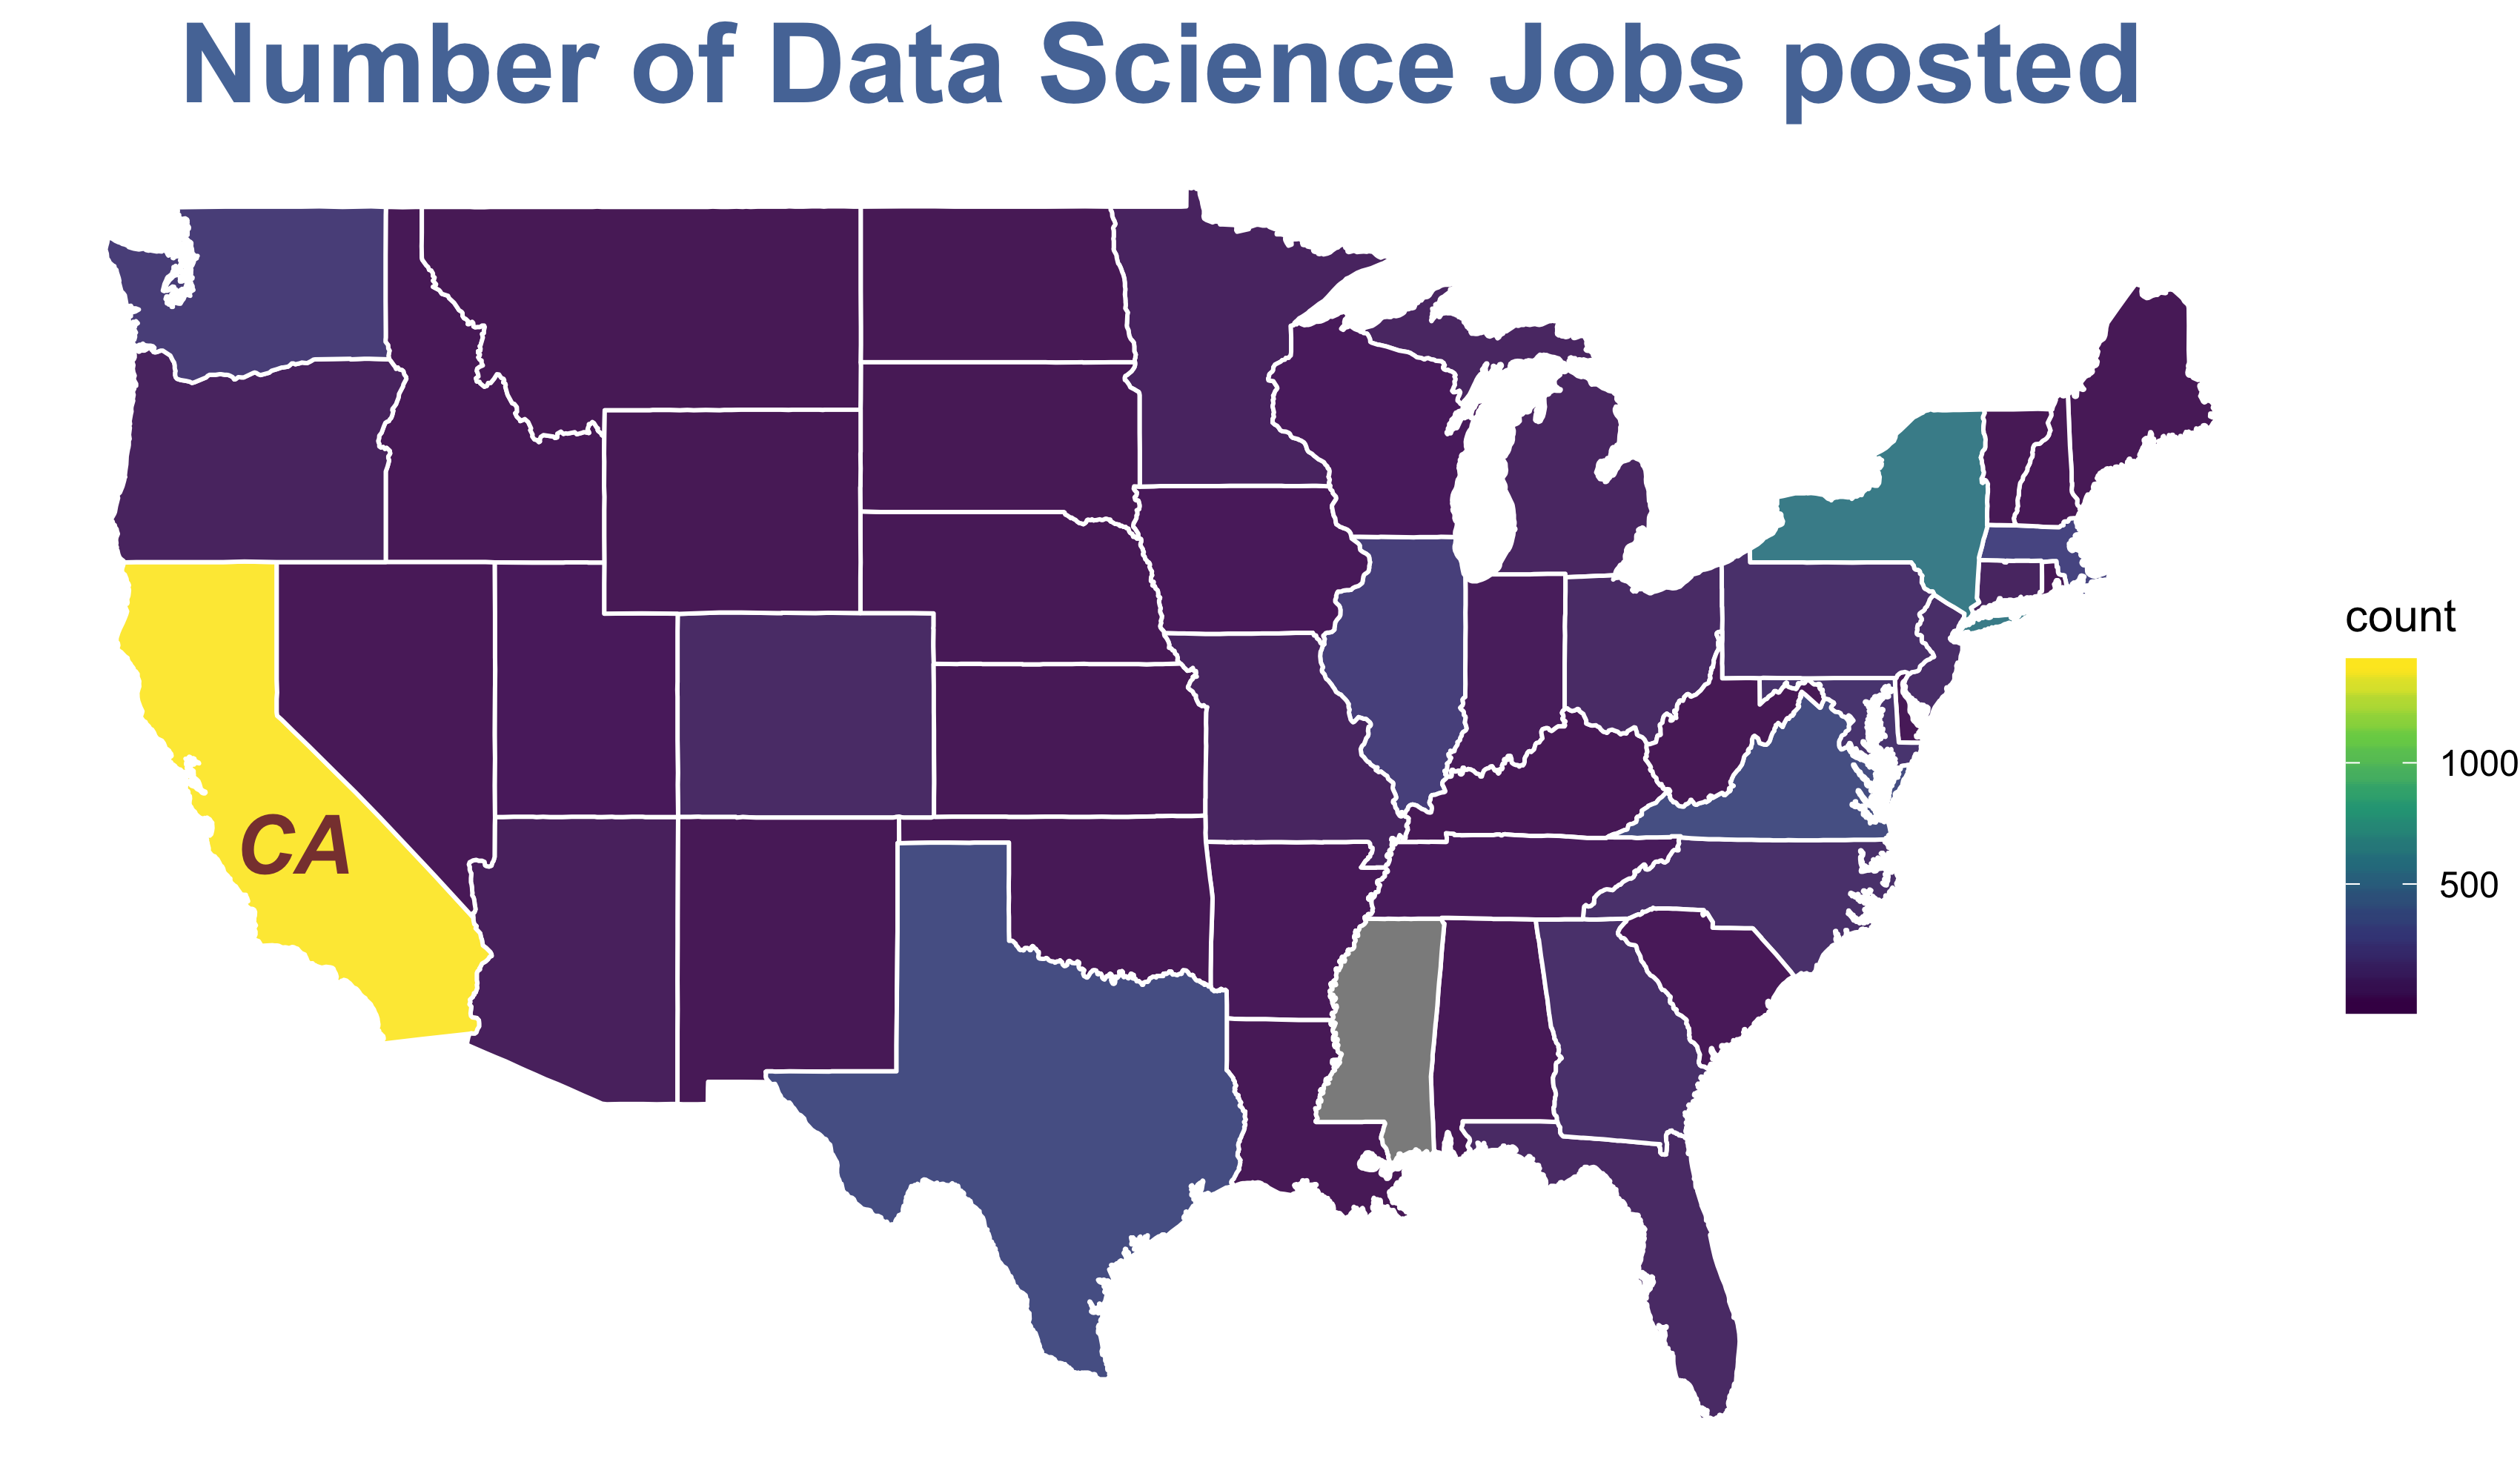

In [85]:
%%R -w 8.5 -h 5 --units in -r 400

us <- map_data("state")
data <- left_join(us, d2, by = "region")

ggplot(data, aes(long, lat, group = group))+
    ggtitle('Number of Data Science Jobs posted') +
    geom_polygon(aes(fill = count), color = "white", alpha = 0.9) +
    scale_fill_viridis_c(option="D") +
    theme_void() +
    theme(plot.title = element_text(size = 27, face = "bold", color = '#5677a6', hjust =0.5)) +
    annotate("text", x=-119.53618, y=36.46341, label= "CA", fontface = 'bold.italic', 
         size = 7, color = '#89403e') +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/map_ca.png', units = 'in', width = 8.5, height = 5)

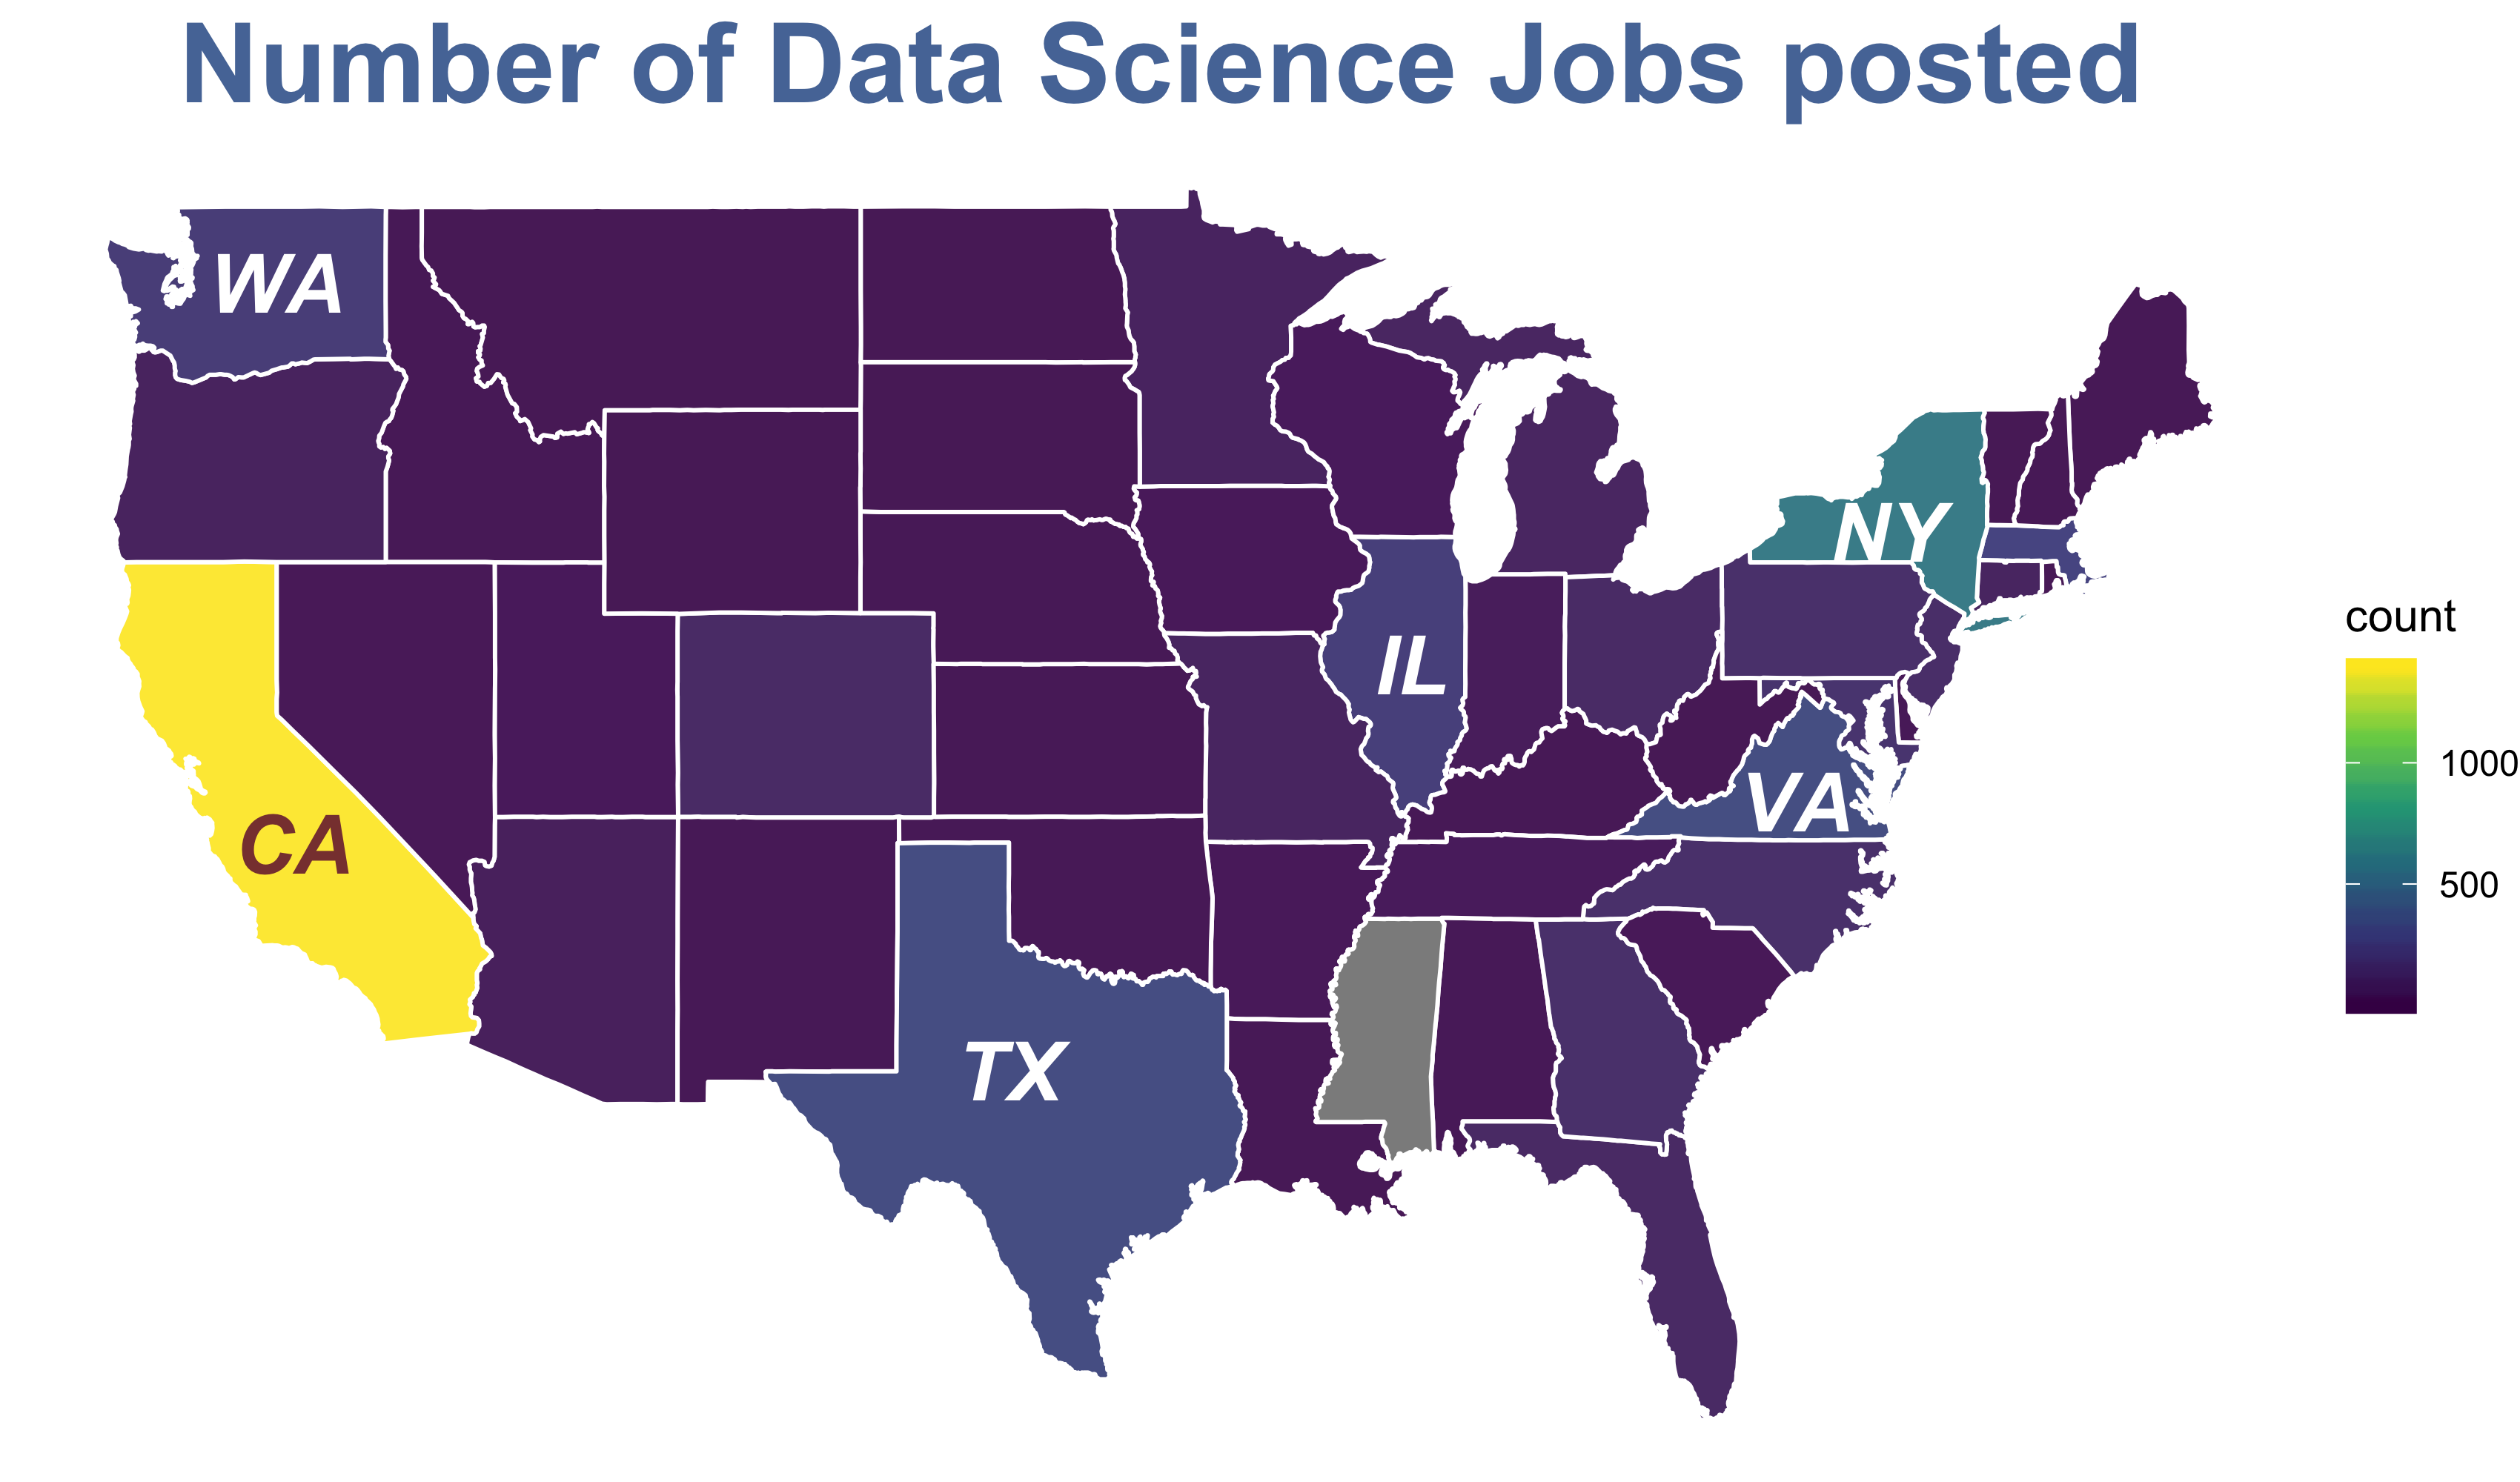

In [86]:
%%R -w 8.5 -h 5 --units in -r 400

us <- map_data("state")
data <- left_join(us, d2, by = "region")

ggplot(data, aes(long, lat, group = group))+
    ggtitle('Number of Data Science Jobs posted') +
    geom_polygon(aes(fill = count), color = "white", alpha = 0.9) +
    scale_fill_viridis_c(option="D") +
    theme_void() +
    theme(plot.title = element_text(size = 27, face = "bold", color = '#5677a6', hjust =0.5)) +
    annotate("text", x=-119.53618, y=36.46341, label= "CA", fontface = 'bold.italic', 
         size = 7, color = '#89403e') +
    annotate("text", x=-76, y=42.6, label= "NY", fontface = 'bold.italic', 
         size = 7, color = 'white') +
    annotate("text", x=-100, y=32, label= "TX", fontface = 'bold.italic', 
         size = 7, color = 'white') +
    annotate("text", x=-120, y=47.5, label= "WA", fontface = 'bold.italic', 
         size = 7, color = 'white') +
    annotate("text", x=-78.5, y=37.3, label= "VA", fontface = 'bold.italic', 
         size = 7, color = 'white') +
    annotate("text", x=-89, y=40, label= "IL", fontface = 'bold.italic', 
         size = 7, color = 'white') +

ggsave('/Users/xuliu/Desktop/EDA/final presentation/map_others.png', units = 'in', width = 8.5, height = 5)

#### Wordcloud

In [1]:
import pandas as pd
df=pd.read_csv('indeed_job_dataset.csv')

In [2]:
dic={}
for skills in df.Skill.dropna():
    #print(skills)
    lst=skills[1:-1].split(', ')
    for item in lst:
        dic[item]=dic.get(item,0)+1
dic=sorted(dic.items(),key=lambda x:x[1],reverse=True)
categories={}
for items in dic:
    categories[items[0][1:-1]]=items[1]

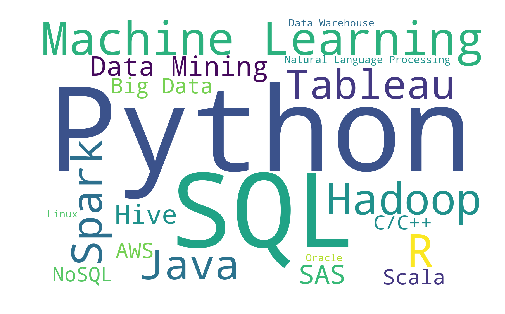

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import sys


wordcloud = WordCloud(width=1600,
                      height=1000,
                      max_words=20,
                      random_state=2,
                      background_color ='white',
                      relative_scaling=0.2)

wordcloud.fit_words(categories)
plt.figure(figsize = (8, 8), facecolor = None) 

plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file("word2.png")
plt.show()


#### Topic Modelling

In [2]:
text_data=[]
for skills in df.Skill.dropna():
    lst=skills[1:-1].split(', ')
    words=[]
    for item in lst:
        words.append(item[1:-1])
    text_data.append(words)

In [3]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [4]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.061*"Hadoop" + 0.058*"Spark" + 0.056*"Python" + 0.052*"Java"')
(1, '0.138*"SQL" + 0.096*"Tableau" + 0.055*"Microsoft SQL Server" + 0.042*"SAS"')
(2, '0.124*"Machine Learning" + 0.122*"Python" + 0.109*"R" + 0.059*"SQL"')


In [5]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [4]:
import pandas as pd
cnt=pd.read_csv('model_gensim.csv')
topic=pd.read_csv('topics.csv')

In [1]:
%load_ext rpy2.ipython

In [2]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [5]:
%R -i cnt
%R -i topic

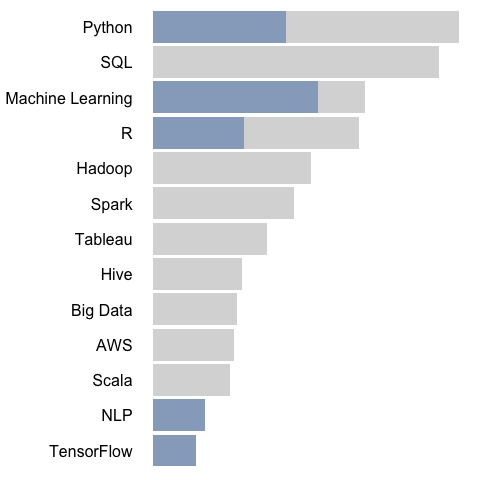

In [6]:
%%R

cnt$group1<-as.factor(cnt$group1)

ggplot()+
    geom_bar(aes(x=reorder(skill,total_freq), y=total_freq), stat='identity',data=cnt,alpha=0.6,fill='grey')+
    geom_bar(aes(x=reorder(skill,total_freq), y=group1_num,fill=group1), stat='identity',data=cnt)+
    scale_fill_manual(values = c('grey','#96ABC5'))+
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_text(color = 'black', size = 16), axis.text.x = element_blank(),
          axis.title.y = element_blank(),axis.title.x = element_blank(),
          legend.position = "none")+
    coord_flip()
#ggsave('img1.png')

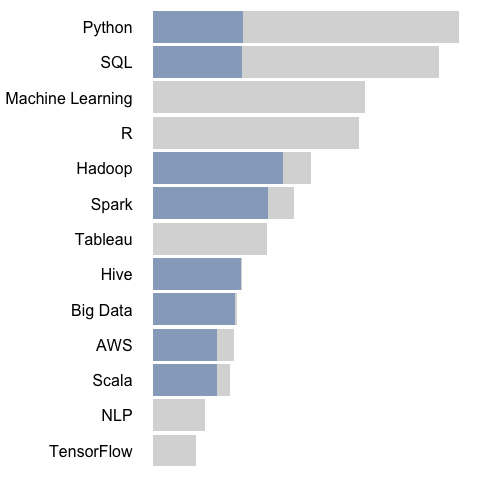

In [7]:
%%R

cnt$group2<-as.factor(cnt$group2)

ggplot()+
    geom_bar(aes(x=reorder(skill,total_freq), y=total_freq), stat='identity',data=cnt,alpha=0.6,fill='grey')+
    geom_bar(aes(x=reorder(skill,total_freq), y=group2_num,fill=group2), stat='identity',data=cnt)+
    scale_fill_manual(values = c('grey','#96ABC5'))+
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_text(color = 'black', size = 16), axis.text.x = element_blank(),
          axis.title.y = element_blank(),axis.title.x = element_blank(),
          legend.position = "none")+
    coord_flip()
#ggsave('img2.png')

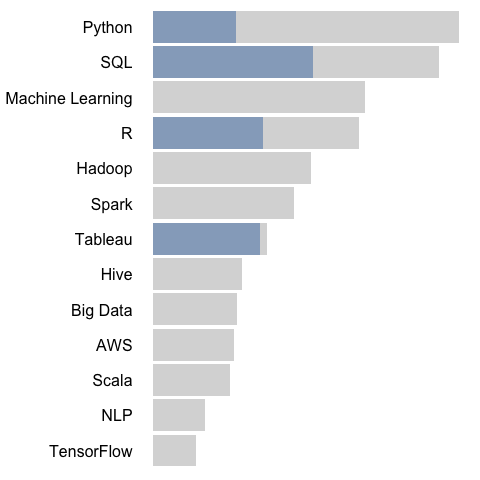

In [8]:
%%R

cnt$group3<-as.factor(cnt$group3)

ggplot()+
    geom_bar(aes(x=reorder(skill,total_freq), y=total_freq), stat='identity',data=cnt,alpha=0.6,fill='grey')+
    geom_bar(aes(x=reorder(skill,total_freq), y=group3_num,fill=group3), stat='identity',data=cnt)+
    scale_fill_manual(values = c('grey','#96ABC5'))+
    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_text(color = 'black', size = 16), axis.text.x = element_blank(),
          axis.title.y = element_blank(),axis.title.x = element_blank(),
          legend.position = "none")+
    coord_flip()
#ggsave('img3.png')

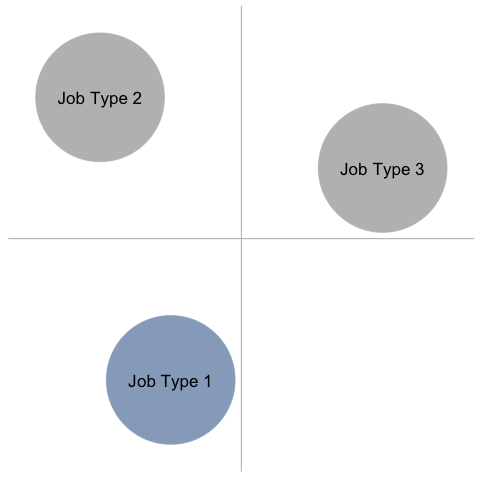

In [9]:
%%R
topic$topic1<-as.factor(topic$topic1)

ggplot()+
    geom_point(data=topic,aes(x=x,y=y,color=topic1),size=60)+
    scale_y_continuous(limits=c(-3,3) )+
    scale_x_continuous(limits=c(-3,3) )+
    geom_hline(yintercept=0,color='grey')+
    geom_vline(xintercept=0,color='grey')+
    scale_color_manual(values = c('grey','#96ABC5'))+
    annotate("text", x =-1 , y = -2, size=6,label = "Job Type 1",color='black')+
    annotate("text", x =-2 , y = 2, size=6,label = "Job Type 2",color='black')+
    annotate("text", x =2 , y = 1, size=6,label = "Job Type 3",color='black')+

    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.y = element_blank(),axis.title.x = element_blank(),legend.position = "none")
#ggsave('img4.png')

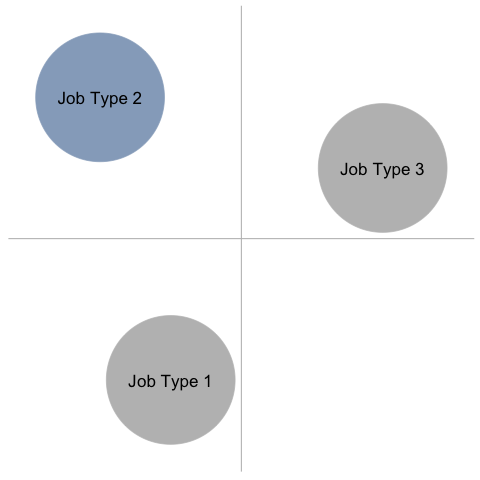

In [10]:
%%R
topic$topic2<-as.factor(topic$topic2)

ggplot()+
    geom_point(data=topic,aes(x=x,y=y,color=topic2),size=60)+
    scale_y_continuous(limits=c(-3,3) )+
    scale_x_continuous(limits=c(-3,3) )+
    geom_hline(yintercept=0,color='grey')+
    geom_vline(xintercept=0,color='grey')+
    scale_color_manual(values = c('grey','#96ABC5'))+
    annotate("text", x =-1 , y = -2, size=6,label = "Job Type 1",color='black')+
    annotate("text", x =-2 , y = 2, size=6,label = "Job Type 2",color='black')+
    annotate("text", x =2 , y = 1, size=6,label = "Job Type 3",color='black')+

    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.y = element_blank(),axis.title.x = element_blank(),legend.position = "none")
#ggsave('img5.png')

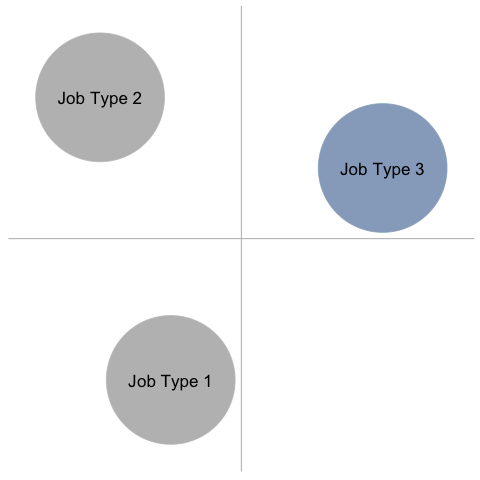

In [11]:
%%R
topic$topic3<-as.factor(topic$topic3)

ggplot()+
    geom_point(data=topic,aes(x=x,y=y,color=topic3),size=60)+
    scale_y_continuous(limits=c(-3,3) )+
    scale_x_continuous(limits=c(-3,3) )+
    geom_hline(yintercept=0,color='grey')+
    geom_vline(xintercept=0,color='grey')+
    scale_color_manual(values = c('grey','#96ABC5'))+
    annotate("text", x =-1 , y = -2, size=6,label = "Job Type 1",color='black')+
    annotate("text", x =-2 , y = 2, size=6,label = "Job Type 2",color='black')+
    annotate("text", x =2 , y = 1, size=6,label = "Job Type 3",color='black')+

    theme(lin = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = 'white'),
          axis.text.y = element_blank(), axis.text.x = element_blank(),
          axis.title.y = element_blank(),axis.title.x = element_blank(),legend.position = "none")
#ggsave('img6.png')